## Import Libraries 


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from Standardization import metric_normalizer
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
display(HTML("<style>.container { width:100% !important; }</style>"))

## Read Data 




In [86]:
df = pd.read_csv('/home/clivence/base_jupyter/Datadump/Model_Data/GU_Model_Data_V1_16k')
df.head()

,Unnamed: 0,open,high,low,close,volume,Date,Year,Month,Day,Time,Ticker,Interval,25EMA,50EMA,75EMA,100EMA,125EMA,Primary_Key,Trend Status,Trend Status Enhanced,Spread,5075 Trend Status,75100 Trend Status,100125 Trend Status,Action,Opportunity,Order Type,Alerts,%K,%D,k_group,ADX,ADXR,slowk,slowd,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,candle_bullish_score,candle_bearish_score,2D Lowest Price,2D Highest Price,2D Low in Pips,2D High in Pips,2D Trade Status,2D Hard Stop Price,2D Hard Stop Loss,2D Trend Change Stop Price,2D Trend Change Stop Loss
0,0,1.60274,1.60416,1.59746,1.59814,12756,2013-09-24,2013,9,24,05:00:00,GBP/USD,H4,1.601548,1.598155,1.595740,1.594108,1.592957,GBP/USDH42013-09-2405:00:00,Bullish,Ultimate Bullish Trend,0.003393,Bullish,Bullish,Bullish,Ultimate Action,Optimal,BUY,1,6.931702,36.264056,Undersold,28.749298,37.742748,19.261396,35.583653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.59556,1.60960,0.00258,0.01146,1,NaN,NaN,NaN,NaN
1,1,1.61721,1.61744,1.60888,1.61085,12829,2013-10-04,2013,10,4,05:00:00,GBP/USD,H4,1.617322,1.613579,1.609944,1.606972,1.604592,GBP/USDH42013-10-0405:00:00,Bullish,Ultimate Bullish Trend,0.003743,Bullish,Bullish,Bullish,Ultimate Action,Optimal,BUY,1,12.145499,14.062217,Undersold,22.332568,26.148279,18.242703,13.359304,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-200,1.60066,1.61181,0.01019,0.00096,0,1.60594,-0.00491,1.60594,-0.00491
2,2,1.61567,1.61685,1.61246,1.61428,15669,2013-10-28,2013,10,28,13:00:00,GBP/USD,H4,1.617229,1.614732,1.612677,1.611066,1.609654,GBP/USDH42013-10-2813:00:00,Bullish,Ultimate Bullish Trend,0.002498,Bullish,Bullish,Bullish,Ultimate Action,Optimal,BUY,1,14.796748,27.316678,Undersold,18.392643,20.999511,33.786845,43.074824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.60232,1.61656,0.01196,0.00228,0,1.60652,-0.00776,1.60432,-0.00996
3,3,1.60351,1.60528,1.60346,1.60446,7454,2013-11-05,2013,11,5,18:00:00,GBP/USD,H4,1.601083,1.604016,1.605490,1.606024,1.606035,GBP/USDH42013-11-0518:00:00,Bearish,Ultimate Bearish Trend,0.002933,Bearish,Bearish,Bearish,Ultimate Action,Unfavorable,SELL,1,88.567839,84.924623,Oversold,28.482116,30.162938,79.100225,80.918476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,200,0,1.60096,1.61179,0.00350,0.00733,0,1.60966,-0.00520,1.60948,-0.00502
4,4,1.59738,1.60466,1.59624,1.60250,21744,2013-11-13,2013,11,13,14:00:00,GBP/USD,H4,1.597471,1.600302,1.602049,1.603092,1.603632,GBP/USDH42013-11-1314:00:00,Bearish,Ultimate Bearish Trend,0.002832,Bearish,Bearish,Bearish,Ultimate Action,Unfavorable,SELL,1,88.744138,66.142447,Oversold,37.952936,33.555668,74.666413,57.482055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.59888,1.61347,0.00362,0.01097,0,1.61034,-0.00784,1.60816,-0.00566


In [3]:
# plt.scatter(x=df['2D High in Pips'], y=df.datetime )

## Custom Functions

## Data Cleaning 

In [87]:
#Subset for trades
df = df[df['Alerts'] ==1] 
df = df[df['Action'] == 'Ultimate Action']
df = df[df['Ticker'] == 'GBP/USD']

df.fillna(0, inplace=True)

In [88]:
#Standardize the dataset
df =  metric_normalizer(df)

#Set date to datetime 
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.sample(5)

,Unnamed: 0,open,high,low,close,volume,Date,Year,Month,Day,Time,Ticker,Interval,25EMA,50EMA,75EMA,100EMA,125EMA,Primary_Key,Trend Status,Trend Status Enhanced,Spread,5075 Trend Status,75100 Trend Status,100125 Trend Status,Action,Opportunity,Order Type,Alerts,%K,%D,k_group,ADX,ADXR,slowk,slowd,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,candle_bullish_score,candle_bearish_score,2D Lowest Price,2D Highest Price,2D Low in Pips,2D High in Pips,2D Trade Status,2D Hard Stop Price,2D Hard Stop Loss,2D Trend Change Stop Price,2D Trend Change Stop Loss
235,235,1.28360,1.28644,1.28339,1.28568,14144,2018-11-26,2018,11,26,10:00:00,GBP/USD,H4,1.283254,1.285114,1.287126,1.288836,1.290288,GBP/USDH42018-11-2610:00:00,Bearish,Ultimate Bearish Trend,18.605155,Bearish,Bearish,Bearish,Ultimate Action,Unfavorable,SELL,1,54.289373,42.261637,Neutral,17.519992,18.282755,69.718075,44.930045,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200,0,1.27255,1.28568,131.3,0.0,1,NaN,NaN,NaN,NaN
33,33,1.71192,1.71238,1.71050,1.71138,10938,2014-07-10,2014,7,10,09:00:00,GBP/USD,H4,1.713123,1.711574,1.709169,1.706700,1.704435,GBP/USDH42014-07-1009:00:00,Bullish,Ultimate Bullish Trend,15.489807,Bullish,Bullish,Bullish,Ultimate Action,Optimal,BUY,1,34.382567,52.824859,slightly_oversold,17.947065,18.900316,40.012766,65.644008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.70752,1.71510,38.6,37.2,0,1.70765,-37.3,1.70836,-30.2
12,12,1.64982,1.65000,1.64219,1.64346,11262,2014-01-13,2014,1,13,06:00:00,GBP/USD,H4,1.645547,1.644539,1.643446,1.642143,1.640696,GBP/USDH42014-01-1306:00:00,Bullish,Ultimate Bullish Trend,10.073163,Bullish,Bullish,Bullish,Ultimate Action,Optimal,BUY,1,38.814815,68.888889,slightly_oversold,16.833700,16.597834,60.392730,71.818153,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-300,1.63466,1.64666,88.0,32.0,0,1.64207,-13.9,1.63893,-45.3
388,388,1.38346,1.38378,1.38122,1.38226,5846,2021-09-16,2021,9,16,05:00:00,GBP/USD,H4,1.383218,1.382326,1.381445,1.380907,1.380667,GBP/USDH42021-09-1605:00:00,Bullish,Ultimate Bullish Trend,8.914350,Bullish,Bullish,Bullish,Ultimate Action,Optimal,BUY,1,24.750831,35.215947,slightly_oversold,16.789307,16.279315,55.927190,68.357462,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-300,1.36621,1.38415,160.5,18.9,0,1.36744,-148.2,1.37472,-75.4
289,289,1.30126,1.30452,1.29954,1.30402,6568,2020-01-21,2020,1,21,06:00:00,GBP/USD,H4,1.302417,1.303823,1.304939,1.305585,1.305777,GBP/USDH42020-01-2106:00:00,Bearish,Ultimate Bearish Trend,14.056113,Bearish,Bearish,Bearish,Ultimate Action,Unfavorable,SELL,1,49.744898,35.586735,Neutral,20.134187,22.430715,82.544195,82.996204,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,1.30347,1.31532,5.5,113.0,0,1.31322,-92.0,1.31288,-88.6


In [11]:
import plotly.graph_objects as go

# Create a list of colors based on the 'color_column'
colors = ['green' if val == 'BUY' else 'RED' for val in df['Order Type']]

fig = go.Figure(data=go.Scatter(
    x=df['Date'],  # Access the 'x' column
    y=df['2D High in Pips'],  # Access the 'y' column
    mode='markers',
    marker=dict(
        size=10,
        color=colors,  # Map colors from the 'color_column'
        opacity=0.8
    )
))

# Customize the layout
fig.update_layout(
    title="Order Type by Date",
    xaxis_title="Date",
    yaxis_title="2D High In Pips",
#     grid=True
)
fig.show()

In [13]:
# Create a list of colors based on the 'color_column'
# colors = ['green' if val == 'BUY' else 'RED' for val in df['Order Type']]

fig = go.Figure(data=go.Scatter(
    x=df['close'],  # Access the 'x' column
    y=df['2D High in Pips'],  # Access the 'y' column
    mode='markers',
    marker=dict(
        size=10,
        color=colors,  # Map colors from the 'color_column'
        opacity=0.8
    )
))

# Customize the layout
fig.update_layout(
    title="Scatter Plot from DataFrame",
    xaxis_title="Close",
    yaxis_title="2D High In Pips",
#     grid=True
)
fig.show()

In [14]:
df['2D High in Pips'].describe()

count    486.000000
mean      76.050412
std       72.396115
min      -94.200000
25%       28.150000
50%       58.000000
75%      106.000000
max      564.000000
Name: 2D High in Pips, dtype: float64

## Preprocessing 


In [89]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
ohe = OneHotEncoder()

In [27]:
# test = ohe.fit_transform(df[['Trend Status','5075 Trend Status', '75100 Trend Status',
#        '100125 Trend Status', 'Action', 'Opportunity', 'Order Type']]).to_array()

# test.values

In [30]:
df.columns[15:30]

Index(['75EMA', '100EMA', '125EMA', 'Primary_Key', 'Trend Status',
       'Trend Status Enhanced', 'Spread', '5075 Trend Status',
       '75100 Trend Status', '100125 Trend Status', 'Action', 'Opportunity',
       'Order Type', 'Alerts', '%K'],
      dtype='object')

In [90]:
#Subset of features to keep
df= df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA','100EMA', '125EMA',
        'Trend Status', 'Spread','5075 Trend Status', '75100 Trend Status',
       '100125 Trend Status', 'Action', 'Opportunity', 'Order Type','2D Lowest Price',
       '2D Highest Price', '2D Low in Pips', '2D High in Pips',
       '2D Trade Status', '2D Hard Stop Price', '2D Hard Stop Loss',
       '2D Trend Change Stop Price', '2D Trend Change Stop Loss','k_group']]

In [91]:
#Apply one-hot encoding 
df= pd.get_dummies(df,columns=['Trend Status','5075 Trend Status', '75100 Trend Status',
       '100125 Trend Status', 'Action', 'Opportunity', 'Order Type','k_group'])

In [32]:
df.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'Date', 'Year',
       'Month', 'Day',
       ...
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable', 'Order Type_BUY',
       'Order Type_SELL', 'k_group_Neutral', 'k_group_Oversold',
       'k_group_Undersold', 'k_group_slightly_oversold'],
      dtype='object', length=117)

In [92]:
#Indepedent Variables 
X = df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable', 'Order Type_BUY',
       'Order Type_SELL']]
#Dependent Variable
Y = df['2D High in Pips'] 

In [34]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


## Linear Model 

### Linear Mode on All Data

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [36]:
#Create and fit linear regression model 
lin_model = LinearRegression().fit(X_train,Y_train)

#Make Predictions on test data
y_preds = lin_model.predict(X_test)

#Evaluate Model Performance 
mae = mean_absolute_error(Y_test, y_preds)
mse = mean_squared_error(Y_test, y_preds)
rmse = mean_squared_error(Y_test, y_preds, squared=False)

print( 'MAE:', mae)
print( 'MSE:', mse)
print( 'RMSE:', rmse)

MAE: 49.142909416773634
MSE: 4897.6396575743565
RMSE: 69.98313838042958


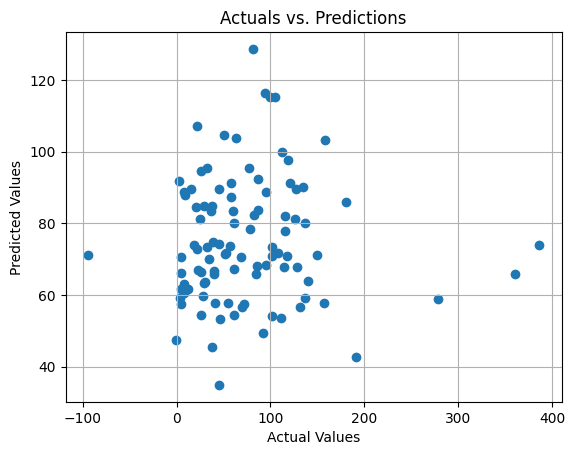

In [37]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_preds)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actuals vs. Predictions")
plt.grid(True)
plt.show()


In [38]:
# Feature Importance Analysis 
coef = lin_model.coef_
print('Feature Importance:', coef)

Feature Importance: [-1.81405654e+03  1.18202102e+03  9.45585674e+01 -3.40339179e+03
 -7.89655342e+03  4.13761624e+04 -7.81286620e+04  6.66358968e+04
 -1.80887342e+04  7.11993200e-01 -2.38460158e+00  2.38460164e+00
 -2.38460158e+00  2.38460164e+00 -2.38460158e+00  2.38460164e+00
 -2.38460158e+00  2.38460164e+00  0.00000000e+00  2.38460164e+00
 -2.38460158e+00  2.38460164e+00 -2.38460158e+00]


In [39]:
lin_model.score(X_test,Y_test)

-0.054194818626714714

In [40]:
#Perform k-folk cross validation 
sell_trade_high_scores = cross_val_score(LinearRegression(),X, Y,cv=5, scoring ='neg_mean_absolute_error' )

print('Cross-validation scores:', -sell_trade_high_scores)
print('Average MAE:', -sell_trade_high_scores.mean())

Cross-validation scores: [53.97484851 63.11899835 48.17776197 45.10603758 54.29961053]
Average MAE: 52.93545138796545


### Linear Model on Buy Trades HIGH 

In [41]:
#Create a subset of df with Buy Trades 
buy_df =  df[df['Order Type_BUY'] == True]

buy_df.shape

(239, 117)

In [42]:
#Visualize the high of buy trades 
fig = go.Figure(data=go.Scatter(
    x=buy_df['close'],  # Access the 'x' column
    y=buy_df['2D High in Pips'],  # Access the 'y' column
    mode='markers',
#     marker=dict(
#         size=10,
#         color=colors,  # Map colors from the 'color_column'
#         opacity=0.8
#     )
))

# Customize the layout
fig.update_layout(
    title="Buy Trades 2D High Price",
    xaxis_title="Closed Price at Trade Open",
    yaxis_title="2D High in Pips",
#     grid=True
)
fig.show()

In [43]:
buy_trade_high_mean = buy_df['2D High in Pips'].mean()
buy_trade_high_mean

75.11799163179869

In [44]:
#Seperate features and label 
#Indepedent Variables 
X = buy_df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable']]
#Dependent Variable
Y = buy_df['2D High in Pips'] 

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [45]:
#Create and fit linear regression model 
lin_model = LinearRegression().fit(X_train,Y_train)

#Create and fit linear regression model 
lin_model = LinearRegression().fit(X_train,Y_train)

#Make Predictions on test data
y_preds = lin_model.predict(X_test)

#Evaluate Model Performance 
mae = mean_absolute_error(Y_test, y_preds)
mse = mean_squared_error(Y_test, y_preds)
rmse = mean_squared_error(Y_test, y_preds, squared=False)

print('Mean', buy_trade_high_mean)
print( 'MAE:', mae)
print( 'MSE:', mse)
print( 'RMSE:', rmse)

Mean 75.11799163179869
MAE: 51.83192228713441
MSE: 4620.380811046404
RMSE: 67.97338310726047


### Linear Model on SELL Trades HIGH 

In [77]:
#Create a subset of df with Buy Trades 
sell_df =  df[df['Order Type_SELL'] == True]

sell_df.shape

(247, 117)

In [47]:
#Visualize the high of sell trades 
fig = go.Figure(data=go.Scatter(
    x=sell_df['close'],  # Access the 'x' column
    y=sell_df['2D High in Pips'],  # Access the 'y' column
    mode='markers',
#     marker=dict(
#         size=10,
#         color=colors,  # Map colors from the 'color_column'
#         opacity=0.8
#     )
))

# Customize the layout
fig.update_layout(
    title="Buy Trades 2D High Price",
    xaxis_title="Closed Price at Trade Open",
    yaxis_title="2D High in Pips",
#     grid=True
)
fig.show()

In [48]:
sell_trade_high_mean = sell_df['2D High in Pips'].mean()
sell_trade_high_mean

76.95263157894675

In [49]:
#Seperate features and label 
#Indepedent Variables 
X = sell_df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable']]
#Dependent Variable
Y = sell_df['2D High in Pips'] 

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [50]:
#Create and fit linear regression model 
lin_model = LinearRegression().fit(X_train,Y_train)

#Create and fit linear regression model 
lin_model = LinearRegression().fit(X_train,Y_train)

#Make Predictions on test data
y_preds = lin_model.predict(X_test)

#Evaluate Model Performance 
mae = mean_absolute_error(Y_test, y_preds)
mse = mean_squared_error(Y_test, y_preds)
rmse = mean_squared_error(Y_test, y_preds, squared=False)

print( 'MAE:', mae)
print( 'MSE:', mse)
print( 'RMSE:', rmse)

MAE: 56.26150624417033
MSE: 6073.19975976131
RMSE: 77.93073693839492


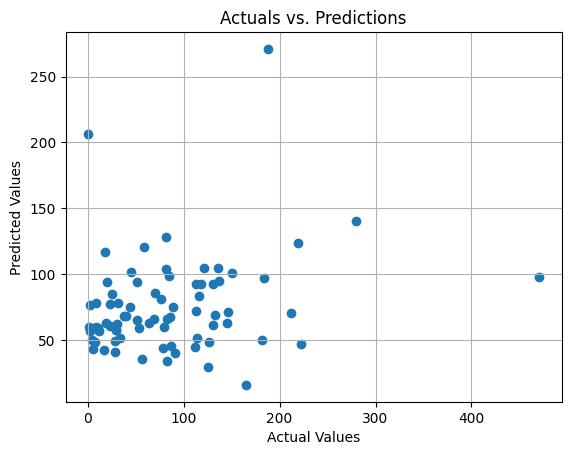

In [51]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_preds)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actuals vs. Predictions")
plt.grid(True)
plt.show()


In [52]:
#Perform k-folk cross validation 
sell_trade_high_scores = cross_val_score(LinearRegression(),X, Y,cv=5, scoring ='neg_mean_absolute_error' )

print('Cross-validation scores:', -sell_trade_high_scores)
print('Average MAE:', -sell_trade_high_scores.mean())

Cross-validation scores: [62.49430399 78.86048062 47.03828755 56.19831784 50.65147582]
Average MAE: 59.04857316570248


## Random Forest Model

In [93]:
#Indepedent Variables 
X = df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable', 'Order Type_BUY',
       'Order Type_SELL']]
#Dependent Variable
Y = df['2D High in Pips'] 

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [97]:
RF_Model = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train, Y_train)

In [98]:
RF_Predictions =  RF_Model.predict(X_test)

In [99]:
from sklearn.metrics import mean_absolute_error

In [100]:
mean_absolute_error(Y_test, RF_Predictions)

50.81598604369205

## Gradient Boosting Model 

### Gradient Boost Model on all Data

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
#Indepedent Variables 
X = df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable', 'Order Type_BUY',
       'Order Type_SELL']]
#Dependent Variable
Y = df['2D High in Pips'] 

In [55]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=5,learning_rate= 0.1, random_state=0).fit(X_train,Y_train)

y_preds =gbr.predict(X_test)
    
#Evaluate Model Performance 
mae = mean_absolute_error(Y_test, y_preds)
mse = mean_squared_error(Y_test, y_preds)
rmse = mean_squared_error(Y_test, y_preds, squared=False)
gbr_score = gbr.score(X_test, Y_test)

print( 'MAE:', mae)
print( 'MSE:', mse)
print( 'RMSE:', rmse)
print('Score', gbr_score)

MAE: 49.5587107052741
MSE: 4308.351451728391
RMSE: 65.63803357603267
Score 0.07264680646505906


In [56]:
#Perform k-folk cross validation 
all_trade_high_scores = cross_val_score(GradientBoostingRegressor(n_estimators=5,learning_rate= 0.1, random_state=0),X, Y,cv=5, scoring ='neg_mean_absolute_error' )

print('Cross-validation scores:', -all_trade_high_scores)
print('Average MAE:', -all_trade_high_scores.mean())

Cross-validation scores: [44.06122631 61.18759262 47.50158839 45.35824177 58.3143893 ]
Average MAE: 51.28460767940332


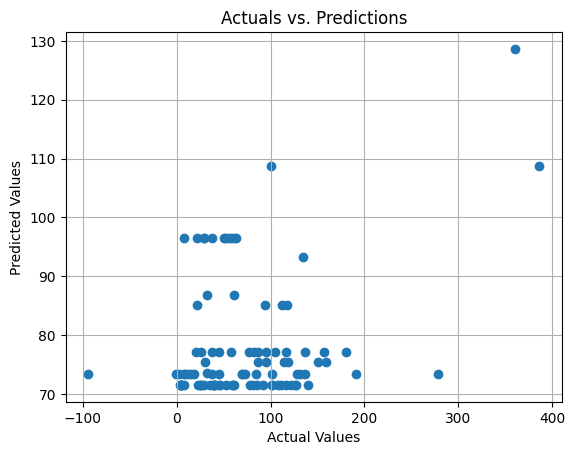

In [57]:
plt.scatter(Y_test, y_preds)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actuals vs. Predictions")
plt.grid(True)
plt.show()

### Gradient Boosting Model on Buy Trades HIGH 

In [58]:
#Seperate features and label 
#Indepedent Variables 
X = buy_df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable']]
#Dependent Variable
Y = buy_df['2D High in Pips'] 

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [61]:
buy_trade_high_mean

75.11799163179869

In [62]:
gbr = GradientBoostingRegressor(n_estimators=100,learning_rate= 0.1, random_state=0).fit(X_train,Y_train)

y_preds =gbr.predict(X_test)
    
#Evaluate Model Performance 
mae = mean_absolute_error(Y_test, y_preds)
mse = mean_squared_error(Y_test, y_preds)
rmse = mean_squared_error(Y_test, y_preds, squared=False)
gbr_score = gbr.score(X_test, Y_test)

print('Mean', buy_trade_high_mean)
print( 'MAE:', mae)
print( 'MSE:', mse)
print( 'RMSE:', rmse)
print('Score', gbr_score)

Mean 75.11799163179869
MAE: 53.54006240924959
MSE: 4914.163090561091
RMSE: 70.10109193558323
Score -0.05570258036259279


In [63]:
#Perform k-folk cross validation 
all_trade_high_scores = cross_val_score(GradientBoostingRegressor(n_estimators=5,learning_rate= 0.1, random_state=0),X, Y,cv=5, scoring ='neg_mean_absolute_error' )

print('Cross-validation scores:', -all_trade_high_scores)
print('Average MAE:', -all_trade_high_scores.mean())

Cross-validation scores: [43.03249981 44.22085813 42.36008332 43.50613258 58.35797147]
Average MAE: 46.29550906267349


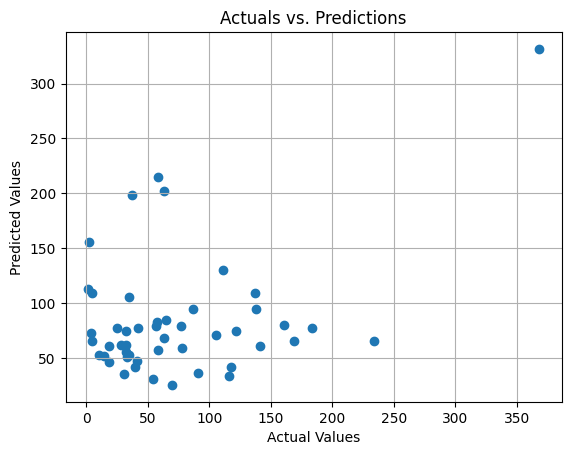

In [64]:
plt.scatter(Y_test, y_preds)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actuals vs. Predictions")
plt.grid(True)
plt.show()

### Gradient Boosting Model on SELL Trades HIGH 

In [65]:
#Seperate features and label 
#Indepedent Variables 
X = sell_df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable']]
#Dependent Variable
Y = sell_df['2D High in Pips'] 

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [66]:
gbr = GradientBoostingRegressor(n_estimators=100,learning_rate= 0.1, random_state=0).fit(X_train,Y_train)

y_preds =gbr.predict(X_test)
    
#Evaluate Model Performance 
mae = mean_absolute_error(Y_test, y_preds)
mse = mean_squared_error(Y_test, y_preds)
rmse = mean_squared_error(Y_test, y_preds, squared=False)
gbr_score = gbr.score(X_test, Y_test)

print('Mean', buy_trade_high_mean)
print( 'MAE:', mae)
print( 'MSE:', mse)
print( 'RMSE:', rmse)
print('Score', gbr_score)

Mean 75.11799163179869
MAE: 59.7656055590972
MSE: 6940.610836676501
RMSE: 83.31032851139467
Score -0.17958526928216356


In [67]:
#Perform k-folk cross validation 
sell_trade_high_scores = cross_val_score(GradientBoostingRegressor(n_estimators=5,learning_rate= 0.1, random_state=0),X, Y,cv=5, scoring ='neg_mean_absolute_error' )

print('Cross-validation scores:', -sell_trade_high_scores)
print('Average MAE:', -sell_trade_high_scores.mean())

Cross-validation scores: [51.72868336 76.52280533 47.29566488 57.85082419 60.80914331]
Average MAE: 58.84142421392632


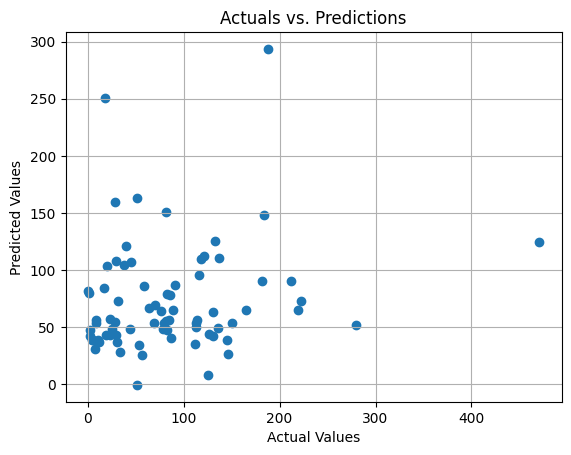

In [69]:
plt.scatter(Y_test, y_preds)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actuals vs. Predictions")
plt.grid(True)
plt.show()

## Bagging & Gradient Boosting 

### Bagging & Gradient Boosting All Trades

In [70]:
from sklearn.ensemble import BaggingRegressor

In [71]:
#Indepedent Variables 
X = df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable', 'Order Type_BUY',
       'Order Type_SELL']]
#Dependent Variable
Y = df['2D High in Pips'] 

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [72]:
basic_bag_model = BaggingRegressor(
    estimator=GradientBoostingRegressor(n_estimators=5,learning_rate= 0.1, random_state=0),
    n_estimators=100,
    max_samples=.8,
    oob_score=True,
    random_state=0
)

basic_bag_model.fit(X_train,Y_train)

#fix variable name 
score = basic_bag_model.oob_score_

y_preds = basic_bag_model.predict(X_test)


#Evaluate Model Performance 
mae = mean_absolute_error(Y_test, y_preds)
mse = mean_squared_error(Y_test, y_preds)
rmse = mean_squared_error(Y_test, y_preds, squared=False)
# gbr_score = gbr.score(X_test, Y_test)

print('Mean', buy_trade_high_mean)
print( 'MAE:', mae)
print( 'MSE:', mse)
print( 'RMSE:', rmse)
print('Score', score)

Mean 75.11799163179869
MAE: 49.364145097025634
MSE: 4289.906304532158
RMSE: 65.4973763179271
Score 0.05584753010132104


### Bagging & Gradient Boosting BUY Trades


In [78]:
#Seperate features and label 
#Indepedent Variables 
X = buy_df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable']]
#Dependent Variable
Y = buy_df['2D High in Pips'] 

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [74]:
basic_bag_model = BaggingRegressor(
    estimator=GradientBoostingRegressor(n_estimators=100,learning_rate= 0.1, random_state=0),
    n_estimators=100,
    max_samples=.8,
    oob_score=True,
    random_state=0
)

basic_bag_model.fit(X_train,Y_train)

#fix variable name 
score = basic_bag_model.oob_score_

y_preds = basic_bag_model.predict(X_test)


#Evaluate Model Performance 
mae = mean_absolute_error(Y_test, y_preds)
mse = mean_squared_error(Y_test, y_preds)
rmse = mean_squared_error(Y_test, y_preds, squared=False)
# gbr_score = gbr.score(X_test, Y_test)

print('Mean', buy_trade_high_mean)
print( 'MAE:', mae)
print( 'MSE:', mse)
print( 'RMSE:', rmse)
print('Score', score)

Mean 75.11799163179869
MAE: 49.42846373095318
MSE: 4011.3290960670165
RMSE: 63.33505424381522
Score 0.05964942572461773


### Bagging & Gradient Boosting SELL Trades


In [75]:
#Seperate features and label 
#Indepedent Variables 
X = sell_df[['open', 'high', 'low', 'close', '25EMA', '50EMA', '75EMA', '100EMA',
       '125EMA', 'Spread','Trend Status_Bearish',
       'Trend Status_Bullish', '5075 Trend Status_Bearish',
       '5075 Trend Status_Bullish', '75100 Trend Status_Bearish',
       '75100 Trend Status_Bullish', '100125 Trend Status_Bearish',
       '100125 Trend Status_Bullish', 'Action_Ultimate Action',
       'Opportunity_Optimal', 'Opportunity_Unfavorable']]
#Dependent Variable
Y = sell_df['2D High in Pips'] 

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [76]:
basic_bag_model = BaggingRegressor(
    estimator=GradientBoostingRegressor(n_estimators=100,learning_rate= 0.2, random_state=0),
    n_estimators=100,
    max_samples=.8,
    oob_score=True,
    random_state=0
)

basic_bag_model.fit(X_train,Y_train)

#fix variable name 
score = basic_bag_model.oob_score_

y_preds = basic_bag_model.predict(X_test)


#Evaluate Model Performance 
mae = mean_absolute_error(Y_test, y_preds)
mse = mean_squared_error(Y_test, y_preds)
rmse = mean_squared_error(Y_test, y_preds, squared=False)
# gbr_score = gbr.score(X_test, Y_test)

print('Mean', sell_trade_high_mean)
print( 'MAE:', mae)
print( 'MSE:', mse)
print( 'RMSE:', rmse)
print('Score', score)

Mean 76.95263157894675
MAE: 57.03513668894472
MSE: 6630.908248860665
RMSE: 81.43038897647895
Score -0.0563374880291041
